# 多重网格原理

以下是使用中心差分和Gauss-Seidel迭代求解边值问题 
$$ 
-\nabla u = 0 ,
$$
其中 $ x \in [0, 1] $ 且边界条件为: $ u(0) = u(1) = 0 $. 
显然, 这个问题的真解是 $u = 0$. 我们用中心差商来离散这个问题, 
$$
u''(x_i) \approx \frac{u_{i-1} - 2u_i + u_{i+1}}{h^2}, 
$$
$i = 0, 1, \cdots, N$, $x_0 = 0$, $x_1 = 1$, $h = 1 / N$.

我们取迭代初值为 
$$
u = \sin(\pi x),
$$
则 $h$ 不但影响问题的求解精度, 也影响了计算的规模. 

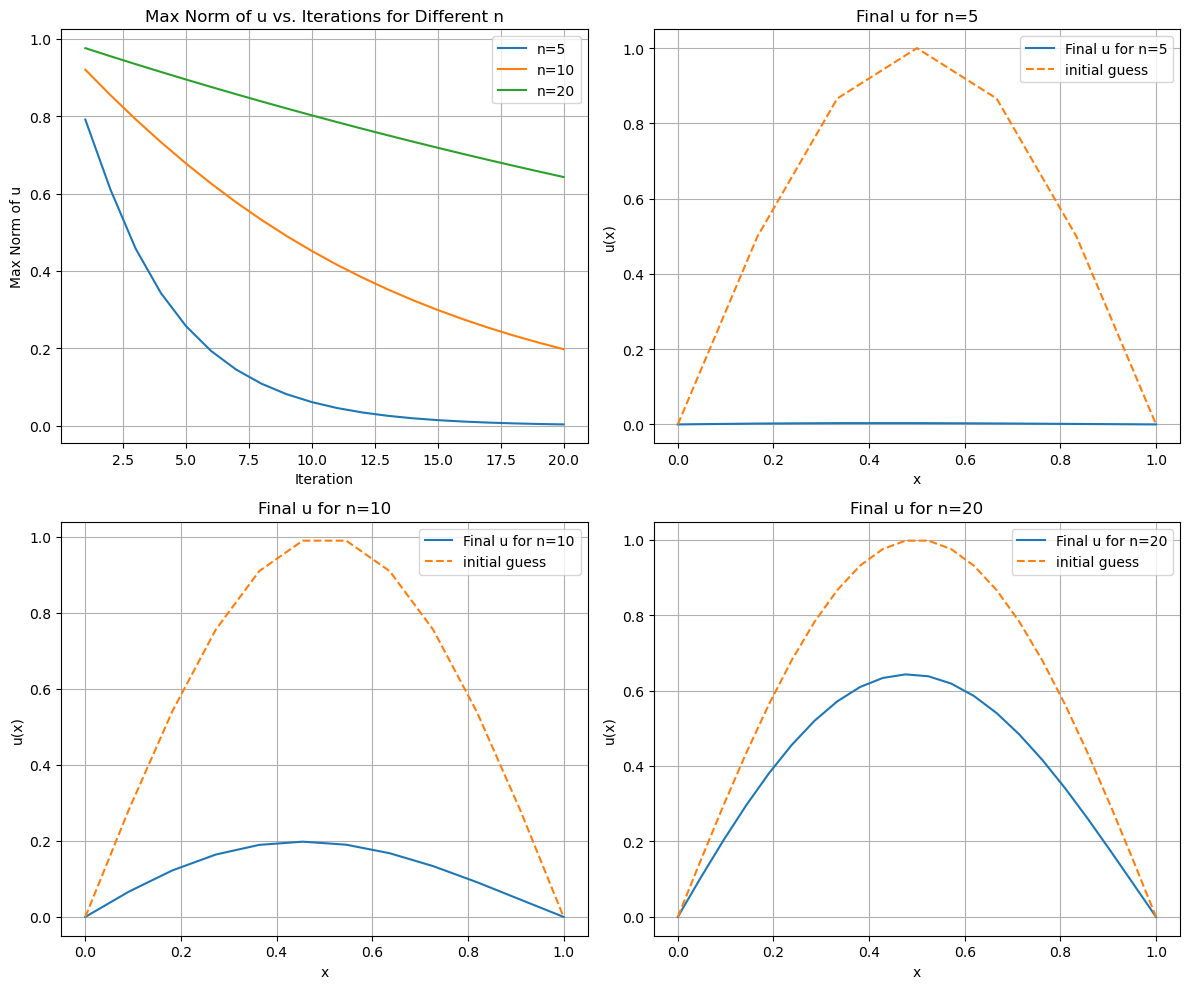

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Define the modified Gauss-Seidel function to track L2 norm of u
def gauss_seidel_with_norm(u, n, tol, max_iter):
    norms = []  # List to hold L2 norms of u for each iteration

    for iteration in range(max_iter):
        u_old = u.copy()

        # Update the interior points
        for i in range(1, n+1):
            u[i] = 0.5 * (u[i-1] + u[i+1])  # Central difference approximation

        # Calculate and store the L2 norm for this iteration
        norm = np.abs(np.max(u)) #np.linalg.norm(u, 2) / np.sqrt(n)
        norms.append(norm)

        # Check for convergence
        #if np.max(np.abs(u_old - u)) < tol:
        #    break

    return u, iteration, norms

# Define parameters
n_values = [5, 10, 20]
tol = 1e-15  # tolerance for stopping criterion
max_iter = 20  # maximum number of iterations
initial_func = lambda x: np.sin(np.pi * x)  # Initial function u = sin(pi*x)

# Modify the function for plotting subplots including the final u values
plt.figure(figsize=(12, 10))

# Plotting for norms
plt.subplot(2, 2, 1)
for n in n_values:
    x = np.linspace(0, 1, n+2)  # grid points including boundary
    u = initial_func(x)  # initial guess
    u_final, iterations, norms = gauss_seidel_with_norm(u, n, tol, max_iter)
    plt.plot(range(1, iterations+2), norms, label=f"n={n}")
plt.title("Max Norm of u vs. Iterations for Different n")
plt.xlabel("Iteration")
plt.ylabel("Max Norm of u")
plt.legend()
plt.grid(True)

# Plotting for final u values for different n
for index, n in enumerate(n_values, start=2):
    x = np.linspace(0, 1, n+2)
    u = initial_func(x)
    u_final, iterations, norms = gauss_seidel_with_norm(u, n, tol, max_iter)
    plt.subplot(2, 2, index)
    plt.plot(x, u_final, label=f"Final u for n={n}")
    plt.plot(x, initial_func(x), '--', label=f"initial guess")
    plt.title(f"Final u for n={n}")
    plt.xlabel("x")
    plt.ylabel("u(x)")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

我们可以看到, 似乎越密的网格, 残量下降越快, 因此收敛的越慢. 但真的就是这样么? 如果我们把初始误差(初值)改成高频震荡的函数又会如何? 比如:
$$
u = \sin(20 \pi x).
$$

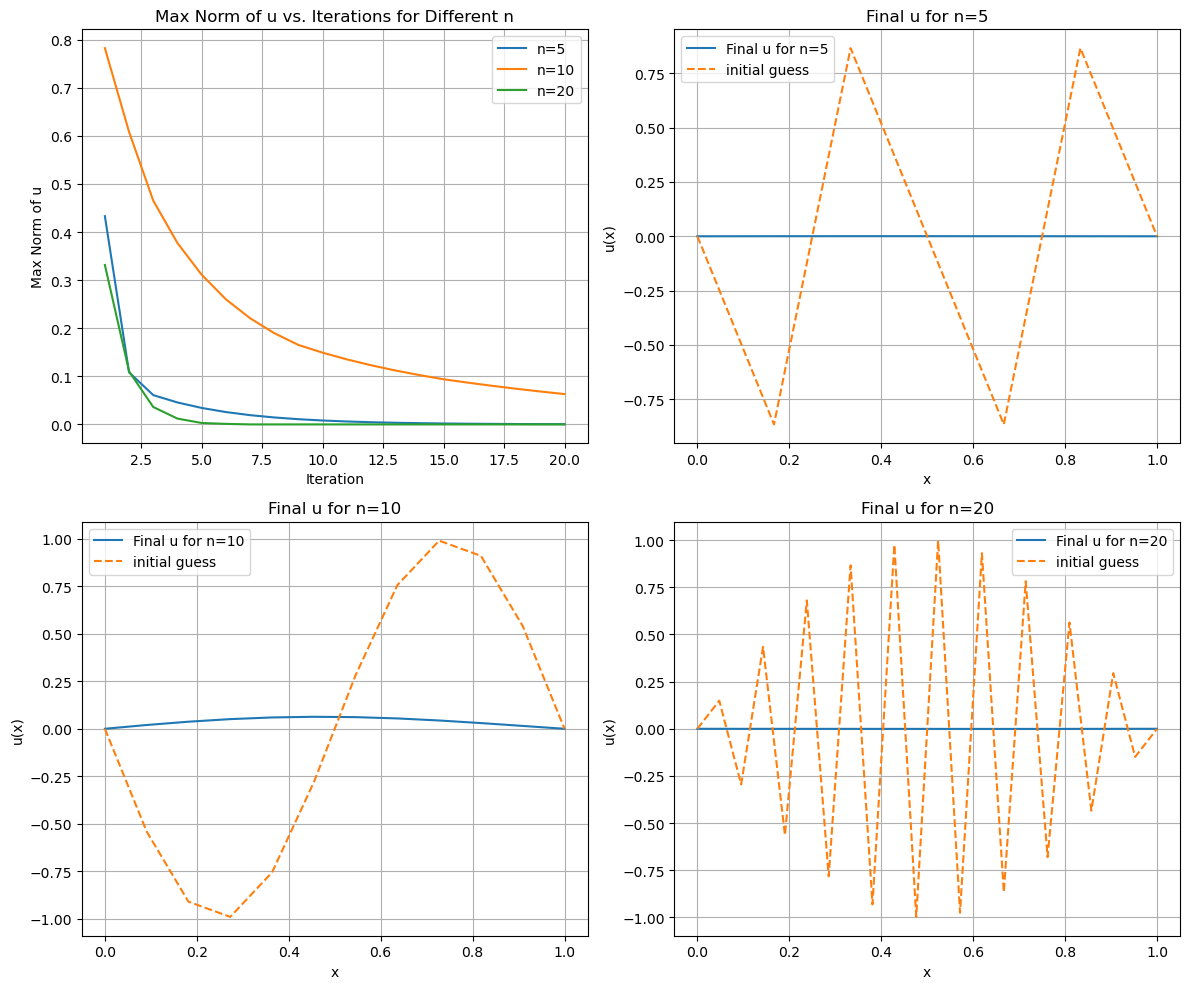

In [2]:
# Define parameters
n_values = [5, 10, 20]
tol = 1e-15  # tolerance for stopping criterion
max_iter = 20  # maximum number of iterations
initial_func = lambda x: np.sin(20 * np.pi * x)  # Initial function u = sin(pi*x)

# Modify the function for plotting subplots including the final u values
plt.figure(figsize=(12, 10))

# Plotting for norms
plt.subplot(2, 2, 1)
for n in n_values:
    x = np.linspace(0, 1, n+2)  # grid points including boundary
    u = initial_func(x)  # initial guess
    u_final, iterations, norms = gauss_seidel_with_norm(u, n, tol, max_iter)
    plt.plot(range(1, iterations+2), norms, label=f"n={n}")
plt.title("Max Norm of u vs. Iterations for Different n")
plt.xlabel("Iteration")
plt.ylabel("Max Norm of u")
plt.legend()
plt.grid(True)

# Plotting for final u values for different n
for index, n in enumerate(n_values, start=2):
    x = np.linspace(0, 1, n+2)
    u = initial_func(x)
    u_final, iterations, norms = gauss_seidel_with_norm(u, n, tol, max_iter)
    plt.subplot(2, 2, index)
    plt.plot(x, u_final, label=f"Final u for n={n}")
    plt.plot(x, initial_func(x), '--',label=f"initial guess")
    plt.title(f"Final u for n={n}")
    plt.xlabel("x")
    plt.ylabel("u(x)")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

有趣的事情发生了, 我们可以看到, 并不是节点越多, 收敛的越慢. 事实上, 我们观察到收敛的最快的是和振荡频率一致的网格. 那么如果一个函数既有高频又有低频呢?

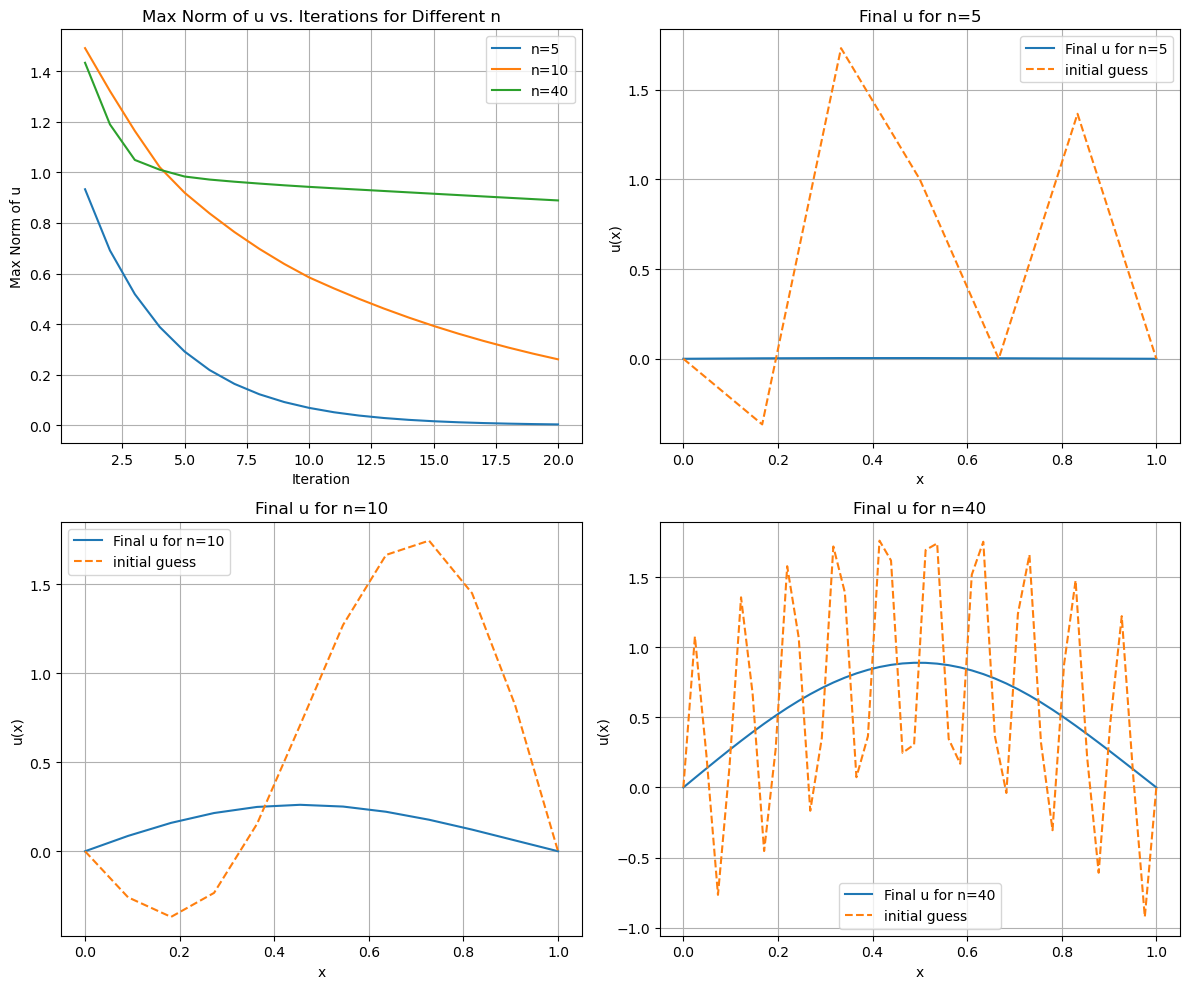

In [8]:
# Define parameters
n_values = [5, 10, 40]
tol = 1e-15  # tolerance for stopping criterion
max_iter = 20  # maximum number of iterations
initial_func = lambda x: np.sin(np.pi * x) + np.sin(20 * np.pi * x)  # Initial function u = sin(pi*x)

# Modify the function for plotting subplots including the final u values
plt.figure(figsize=(12, 10))

# Plotting for norms
plt.subplot(2, 2, 1)
for n in n_values:
    x = np.linspace(0, 1, n+2)  # grid points including boundary
    u = initial_func(x)  # initial guess
    u_final, iterations, norms = gauss_seidel_with_norm(u, n, tol, max_iter)
    plt.plot(range(1, iterations+2), norms, label=f"n={n}")
plt.title("Max Norm of u vs. Iterations for Different n")
plt.xlabel("Iteration")
plt.ylabel("Max Norm of u")
plt.legend()
plt.grid(True)

# Plotting for final u values for different n
for index, n in enumerate(n_values, start=2):
    x = np.linspace(0, 1, n+2)
    u = initial_func(x)
    u_final, iterations, norms = gauss_seidel_with_norm(u, n, tol, max_iter)
    plt.subplot(2, 2, index)
    plt.plot(x, u_final, label=f"Final u for n={n}")
    plt.plot(x, initial_func(x), '--',label=f"initial guess")
    plt.title(f"Final u for n={n}")
    plt.xlabel("x")
    plt.ylabel("u(x)")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

现在问题越来越明显了, 高频的误差, 我们用密网格迭代, 低频的误差, 我们用粗网格迭代. 但要注意解决两个问题: 
1. 如何分离高频和低频误差?
2. 如何不让粗网格迭代产生的大步长误差污染密网格产生的小步长误差?
3. 这么做, 有没有理论依据?
对以上3个问题的正面回答, 构成了多重网格方法的来源.